In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Downloads/Medicaldataset.csv')
df

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [4]:
df.isna().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [5]:
df.nunique()

Age                          75
Gender                        2
Heart rate                   79
Systolic blood pressure     116
Diastolic blood pressure     73
Blood sugar                 244
CK-MB                       700
Troponin                    352
Result                        2
dtype: int64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics
summary = df.describe()
summary

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.193328,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.638173,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [10]:
correlation_matrix = df.corr()
correlation_matrix

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
Age,1.000000,-0.093560,-0.023655,0.018231,0.002812,-0.004007,0.017700,0.088557
Gender,-0.093560,1.000000,-0.026781,0.011065,-0.009370,0.006668,0.017527,0.065793
Heart rate,-0.023655,-0.026781,1.000000,0.010882,0.108353,-0.019584,-0.013001,0.011180
Systolic blood pressure,0.018231,0.011065,0.010882,1.000000,0.586166,0.020807,-0.016396,0.043729
Diastolic blood pressure,0.002812,-0.009370,0.108353,0.586166,1.000000,-0.025614,-0.023403,0.043360
Blood sugar,-0.004007,0.006668,-0.019584,0.020807,-0.025614,1.000000,0.045757,0.021069
CK-MB,0.017700,0.017527,-0.013001,-0.016396,-0.023403,0.045757,1.000000,-0.016008
Troponin,0.088557,0.065793,0.011180,0.043729,0.043360,0.021069,-0.016008,1.000000


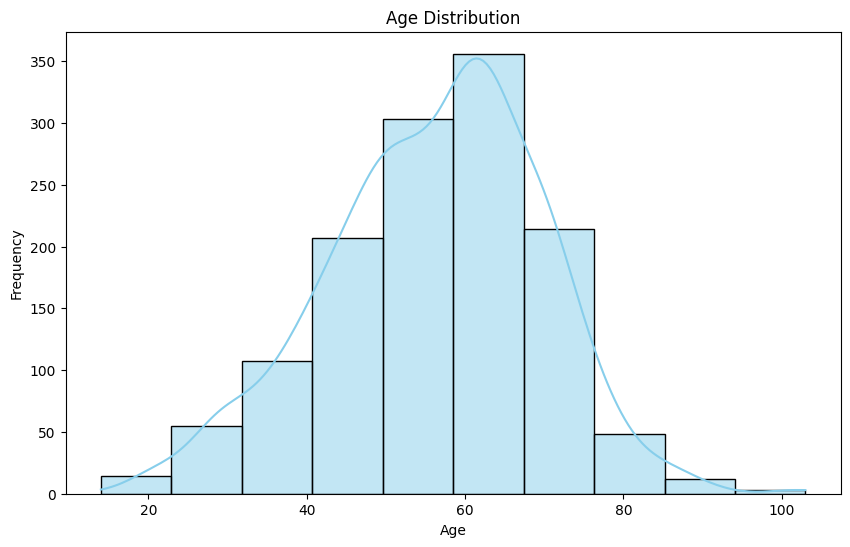

In [14]:
# Histogram/Bar Chart
def plot_age_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Age'], bins=10, color='skyblue', kde=True)
    plt.title("Age Distribution")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.show()
plot_age_distribution(df)

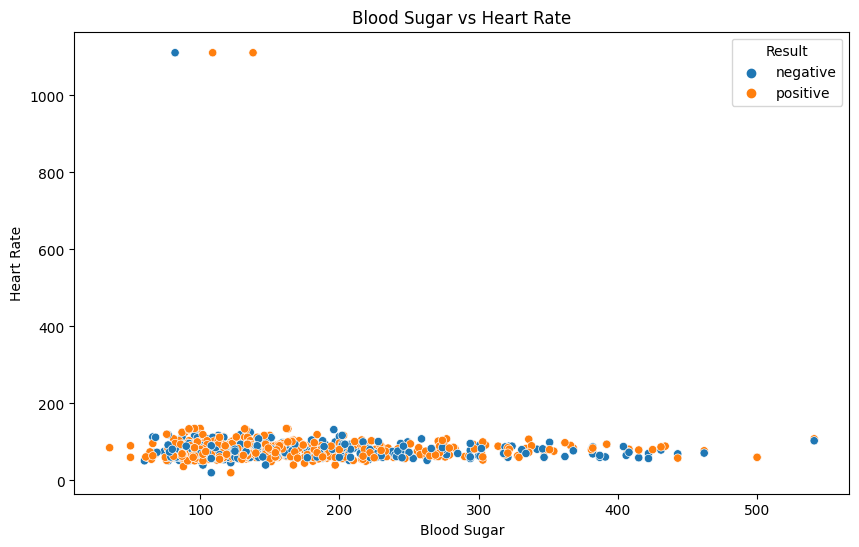

In [16]:
# Scatter Plot
def plot_blood_sugar_vs_heart_rate(data):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Blood sugar', y='Heart rate', hue='Result', data=df)
    plt.title("Blood Sugar vs Heart Rate")
    plt.xlabel("Blood Sugar")
    plt.ylabel("Heart Rate")
    plt.show()
plot_blood_sugar_vs_heart_rate(df)

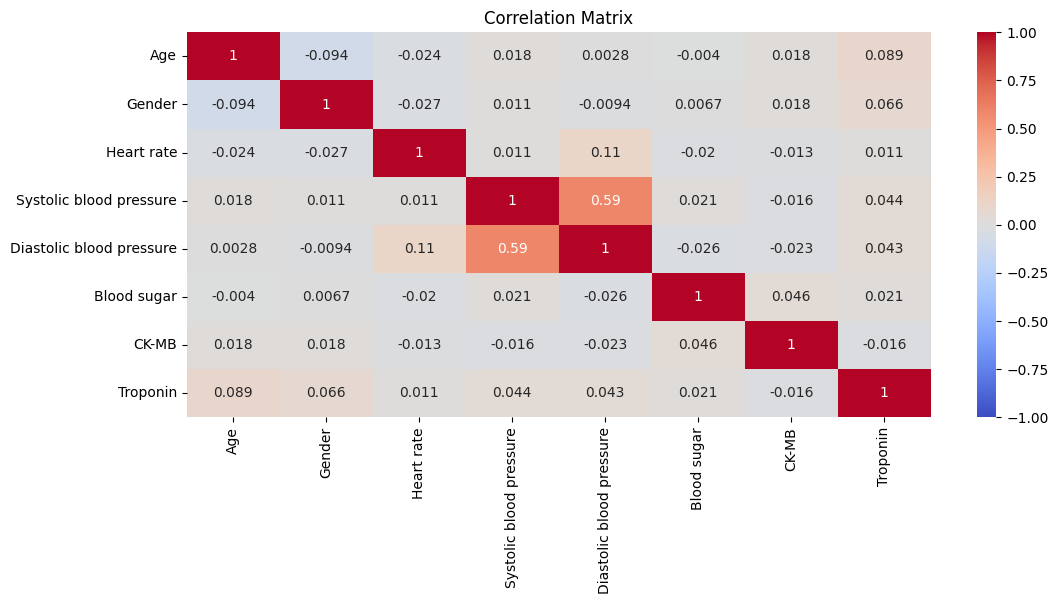

In [20]:
# Heatmap
def plot_correlation_heatmap(df):
    plt.figure(figsize=(12,5))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title("Correlation Matrix")
    plt.show()
plot_correlation_heatmap(df)